In [0]:
import tensorflow as tf 
tf.test.gpu_device_name()

''

**EDA on Breast Cancer Survival data**

**1. Problem Statement**

The Breast cancer survival dataset contains cases from a study that was conducted between 1958 to 1969 on the survival of patients who had undergone operation. 

**2. Importing Packages**

In [0]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [0]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

**3. Loading Data**

In [0]:
import pandas_profiling
import pandas as pd
from pandas_profiling import ProfileReport
csv_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv')
csv_df

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


**Description of the Dataset**

This dataset provides information about the survial of the breast cancer patients based on age, number of axillay nodes detected, opeartion year. 

*   Age of patient at time of operation
*   Patient’s year of operation
*   Number of positive auxillary nodes detected
*   Survival status.


**Pandas Profiling before Data Preprocessing**

In [0]:
pandas_profiling.ProfileReport(csv_df)

Number of variables,4
Number of observations,306
Total Missing (%),0.0%
Total size in memory,9.7 KiB
Average record size in memory,32.4 B
Numeric,3
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


**Observations**

Dataset info:

Number of variables: 4 Number of observations: 306 Missing cells: 0 (0.00%) Variables types:

Numeric = 3 Categorical = 0 Boolean = 1 Text (Unique) = 0 Rejected = 0


*   Age has high cardinality (49 distinct values)
*   Years_of-operation has skewness of 0.078755 and kurtosis of 1.118.
*   Pos_axillary_nodes has high cardinality (32 distinct values)
*   Pos_axillary_nodes has an outlier as its max value lies far away from mean
*   Pos_axillary_nodes have 44.4% zeroes
*   Pos_axillary_nodes and status are correlated with each other










**Data Preprocessing**



*  Run dataset again to avoid errors.




In [0]:
csv_df.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1




*   check if any columns have null values.




In [0]:
csv_df.isnull().sum()

Age                   0
Years_of_operation    0
Pos_axillary_nodes    0
Status                0
dtype: int64



*   Here we see that there are no null values in nany column.






*   Check the minimum and maximun age of the patients and if any are NaN




In [0]:
print("'Age'")                                                                
print("Minimum value: ", csv_df["Age"].min())
print("Maximum value: ", csv_df["Age"].max())
print("How many values are NaN?: ", pd.isnull(csv_df['Age']).sum())

'Age'
Minimum value:  30
Maximum value:  83
How many values are NaN?:  0


In [0]:
csv_df.Age.max()
a=csv_df.Age[csv_df.Age>85]
b=csv_df.Age[csv_df.Age<0]
print(a)
print(b)

Series([], Name: Age, dtype: int64)
Series([], Name: Age, dtype: int64)




*   Convert the numerical value of Status column to catagorical for easy interpretation of data

1.   Status 1: If patients survived for 5 years mark as Yes
2.   Status 2: If patients died withing 5 years mark as No 










In [0]:
csv_df['Status'] = csv_df['Status'].map({1:'Yes', 2:'No'})
csv_df.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


**Outliers Treatment**

From the obseprofiling we found that there is an outlier in the Pos_axilary_nodes column. For the purpose of this analysis, simply replace any out-of-range age values with "NaN", rather than deleting the rows from the data set.

In [0]:
import numpy as np

def pos_of_axillary_nodes(Pos_axillary_nodes):                                                     # Create a new column "age_clean" that replaces out-of-range ages with "NaN"
    if Pos_axillary_nodes>=0 and Pos_axillary_nodes<=40:                                             # The oldest living person on record lived to be 122 years, 164 days (Jeanne Calment, 1875-1997)
        return Pos_axillary_nodes
    else:
        return np.nan
csv_df['pos'] = csv_df['Pos_axillary_nodes'].apply(pos_of_axillary_nodes)

print("'pos'")                                                          # Check out the new column and make sure it looks right
print("Minimum value: ", csv_df["pos"].min())
print("Maximum value: ", csv_df["pos"].max())
print("How many values are NaN?: ", pd.isnull(csv_df['pos']).sum())
print("Frequency table for pos_of_axillary_nodes:")
csv_df["pos"].value_counts().sort_index(0)

'pos'
Minimum value:  0.0
Maximum value:  35.0
How many values are NaN?:  2
Frequency table for pos_of_axillary_nodes:


0.0     136
1.0     41 
2.0     20 
3.0     20 
4.0     13 
5.0     6  
6.0     7  
7.0     7  
8.0     7  
9.0     6  
10.0    3  
11.0    4  
12.0    2  
13.0    5  
14.0    4  
15.0    3  
16.0    1  
17.0    1  
18.0    1  
19.0    3  
20.0    2  
21.0    1  
22.0    3  
23.0    3  
24.0    1  
25.0    1  
28.0    1  
30.0    1  
35.0    1  
Name: pos, dtype: int64

**Pandas Profiling before Data Preprocessing**

In [0]:
import pandas_profiling
import pandas as pd
csv_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv')
csv_df
pandas_profiling.ProfileReport(csv_df)

Number of variables,4
Number of observations,306
Total Missing (%),0.0%
Total size in memory,9.7 KiB
Average record size in memory,32.4 B
Numeric,3
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


**Observations**

Dataset info:

Number of variables: 4 Number of observations: 306 Missing cells: 0 (0.00%)

Variables types:

Numeric = 3 Categorical = 0 Boolean = 1 Text (Unique) = 0 Rejected = 0

*   Pos_axillary_nodes has an outlier as its max value lies far away from mean




**Exploratory Data Analysis**

**Analysis based on age group of patients most affected by breast cancer**

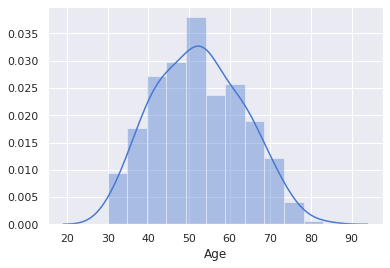

In [0]:
sns.set(color_codes=True)                                                # Plot a histogram of the respondents' ages 
sns.set_palette(sns.color_palette("muted"))

sns.distplot(csv_df["Age"].dropna());

**Observation**


*   It can be inferred that age distribution is maximum between 40s to mid-50s
 



**Analysis based on the year in which maximun operation were held**



Text(0, 0.5, 'Count')

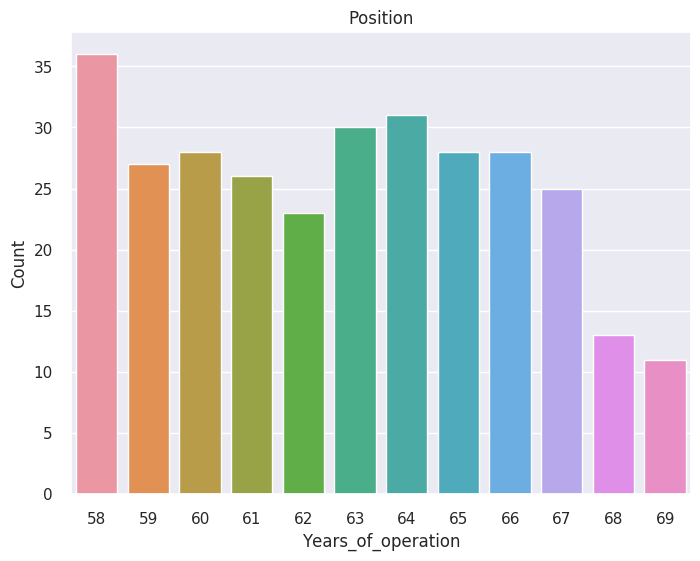

In [0]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(csv_df['Years_of_operation'].dropna(),ax=ax)
plt.title('Position')
plt.ylabel('Count')

**Observation**

*   It can be inferred that maximum opeartions were held in the years 1958-1961, 1963-1967.




**Analysis based on Survival**

1. Years_of_operation vs survival 


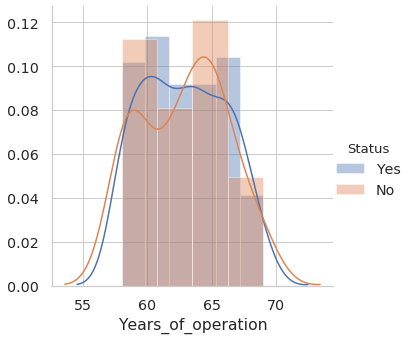

In [0]:
sns.FacetGrid(csv_df, hue="Status", size=5)\
.map(sns.distplot, "Years_of_operation").add_legend();


**Observation**

*   There is major overlapping observed.
*   it can be observed that in the years 1960 and 1965 there were more unsuccessful operations.



2. Age vs Survival

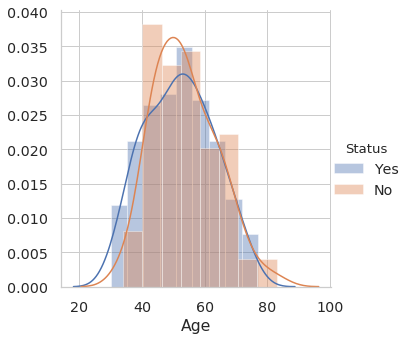

In [0]:
sns.FacetGrid(csv_df, hue="Status", size=5)\
.map(sns.distplot, "Age").add_legend();

**Observation**

*   There is high overlap observed, implying that the survival status of the patient post operation is independent of the patient’s age.
*   Despite of high overlap we can still say that people of age between 30-40 are more likely to survive, while people of age 40-60 are less likely to survive.




3. Pos_axillary_nodes vs Survival

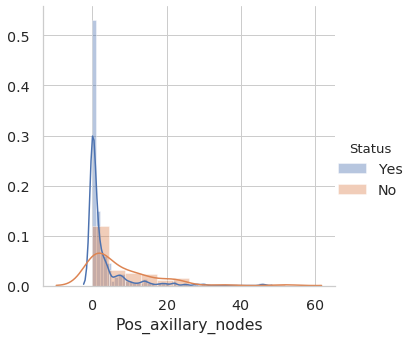

In [0]:
sns.FacetGrid(csv_df, hue="Status", size=5)\
.map(sns.distplot, "Pos_axillary_nodes").add_legend();

**Observation**

*   It can be observed that patients having less than 0-3 nodes are more likely to survive. 
*   There are very few chances of surviving if there are more than 3 nodes.




**How survival is dependent on age and presence of number of nodes**

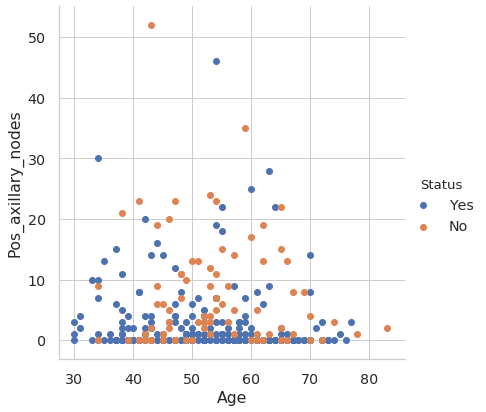

In [0]:
sns.set_style('whitegrid')
sns.FacetGrid(csv_df, hue = 'Status' , height = 6)\
 .map(plt.scatter,'Age', 'Pos_axillary_nodes')\
 .add_legend()

**Observation**

*   Most patients who didn’t had any positive auxiliary node detected (i.e. positive_axillary_nodes = 0) survived over 5 years post operation irrespective of age.
*   Patients of age between 45-65 having more than 10 axillary nodes detected are less likely to survive.




**Seaborn plot to understand the survival of patients based on number of nodes and age**

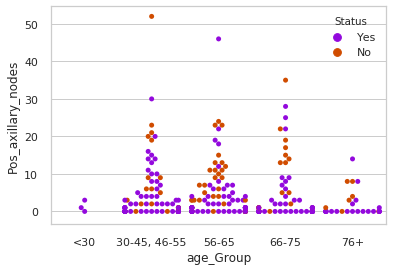

In [0]:
sns.set(style="whitegrid", palette="muted")


# "Melt" the dataset to "long-form" or "tidy" representation
pd.melt(csv_df, "age_Group")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="age_Group", y="Pos_axillary_nodes", hue="Status", 
              palette='gnuplot', data=csv_df)

**Observation**

*   We can observe that there are more patients from the age group between 30-65 who are having 0 to more than 20 number of nodes and these group of patients are affected the most.



**How age group of patients is related to survival**

In [0]:
csv_df['age_Group'] = pd.cut(csv_df['Age'].dropna(),
                         [0,30,46,56,66,76],
                         labels=['<30','30-45, 46-55','56-65','66-75','76+'], include_lowest=True)

Text(0.5, 1.0, 'Age Group vs Survival')

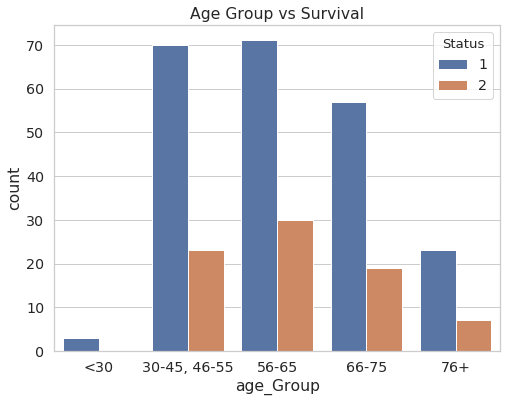

In [0]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = csv_df,x = 'age_Group', hue='Status')
plt.title('Age Group vs Survival')

**Observation**

*   It can be observed that patients between age 30-65 are more likely to survive.



**Box plot and violin plot to understand survival of patients based on age, axillary nodes and opeartion year**

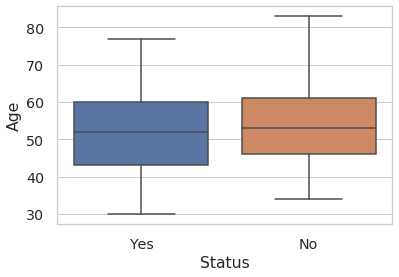

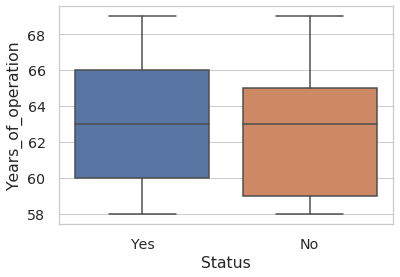

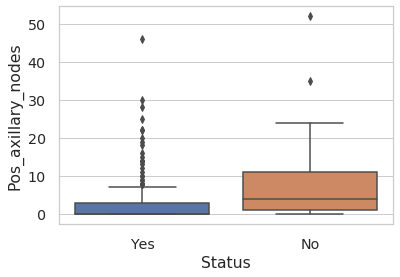

In [0]:
sns.boxplot(x='Status',y='Age',data=csv_df)
sns.boxplot(x='Status',y='Years_of_operation',data=csv_df)
sns.boxplot(x='Status',y='Pos_axillary_nodes',data=csv_df)

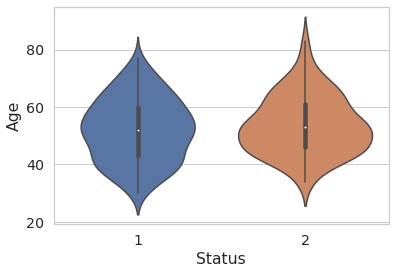

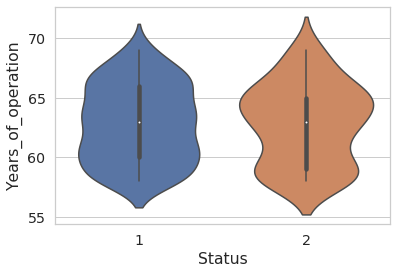

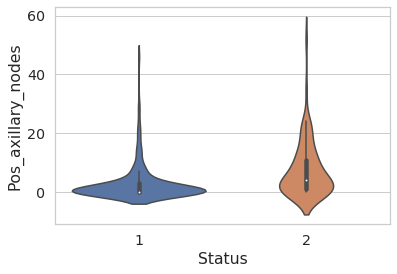

In [0]:
sns.violinplot(x='Status',y='Age',data=csv_df, height=10)
plt.show()
sns.violinplot(x='Status',y='Years_of_operation',data=csv_df,height = 10)
plt.show()
sns.violinplot(x='Status',y='Pos_axillary_nodes',data=csv_df,height = 10)
plt.show()

**Observations**

*   There were comparatively more people in the age group 45 to 65 who did not survive. However, patient age alone cannot doesnt determine the survival.
*   There were comparatively more people who got operated in the year 1963-1965 did not survive for 5 years.
*   Patients with more than 0-1 nodes are more likely to survive. More nodes less chances of survival.



**Pair plot to understand the relation between the features pairwise**

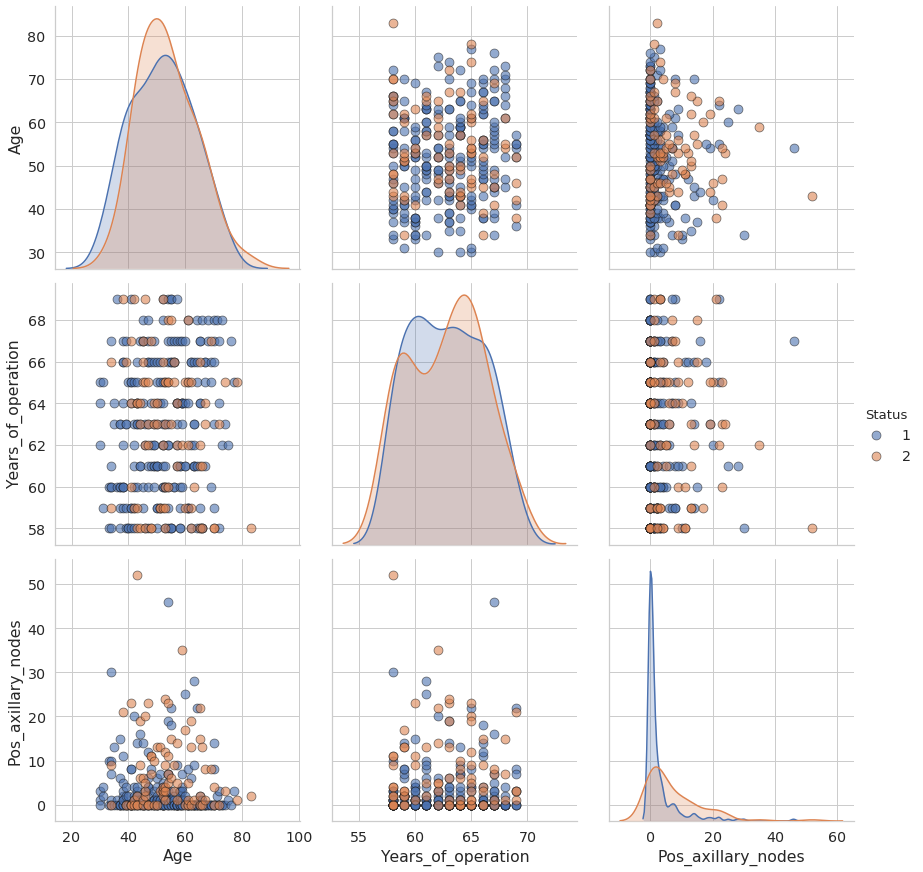

In [0]:
sns.pairplot(csv_df, vars = ['Age', 'Years_of_operation', 'Pos_axillary_nodes'], 
             hue = 'Status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

**Observations**

*   In this plot we can see that there is no much differnce observed from the above analysed PDF plots and scatter plot 
*   We can clearly see the relation between age, year and axillary nodes. 



**Age of patients operated most wrt years**

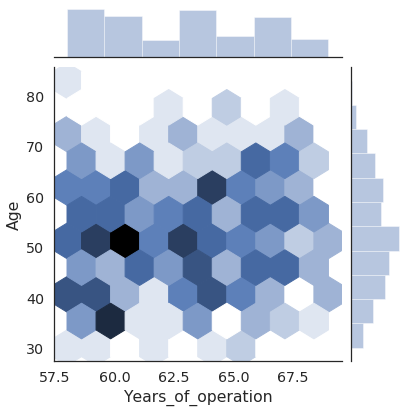

In [0]:
with sns.axes_style('white'):
    sns.jointplot("Years_of_operation", "Age", csv_df, kind='hex')

**Observations**

*   It can be observed that the years 1959–1964 witnessed more patients in age group of 40–60 years.



**Summary**

*   The age range at which patients got operated most is from 40-60 years. 
*   75% of the patients had 4 or less positive axillary nodes detected.
*   Very few patients had 20 or more positive axillary nodes detected.
*   Majority of the Patients who didn’t had any positive auxiliary node detected (i.e. positive_axillary_nodes = 0) survived for 5 years.However if the patients age is above 60 with axillary nodes there is less chance of survival even after operated.
*   Most patients were operated in the year range 1959-1964.
*   Absence of positive axillary nodes or having fewer positive axillary nodes doesn’t guarantee survival over 5 years post operation.





